# <center>Helicopter escapes!</center>



We begin by importing functions from helper library and typing command responsible for data visualization.

In [1]:
from helper import *

Now, let's get the data from the [https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes] Wikipedia article.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)

In [32]:
print(type(data))

<class 'list'>


Let's print the first three rows

In [3]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired 

Most of the space on the screen is taken by the last element, the "Details" column.

We are going to get rid of that column.

In [4]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


Now we want to have only year in the first column. By using fetch_year function for each row in data we can easily do it.

In [5]:
for row in data:
    row[0] = fetch_year(row[0])
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


The goal is to count all escapes for each year and visualize this data.

In [6]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

years = []
for y in range(min_year, max_year + 1):
    years.append(y)
attempts_per_year = []

for y in years:
    attempts_per_year.append([y,0])
print(attempts_per_year)    

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


In [7]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
             ya[1] +=1
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


We have looped over data and count every escape. Let's make a horizontal bar plot to visualize that. To make that happen in Jupyter, we need to use the line: %matplotlib inline

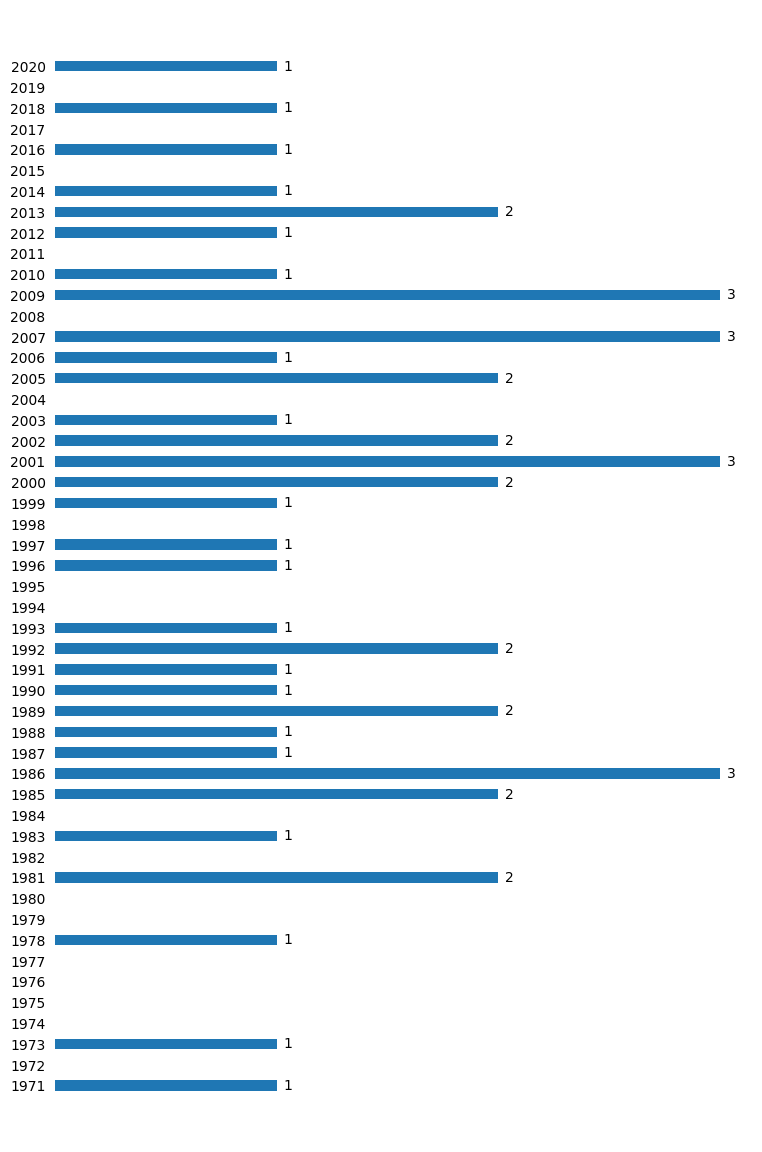

In [14]:
%matplotlib inline
barplot(attempts_per_year)

The years in which the most helicopter prison break attempts occurred were 1986, 2001, 2007 and 2009, with a total of three attempts each.

But intresting thing is, in which countries do the most attempted helicopter prison escapes occur?

Dataquest programmers, stored the data in new variable called df.

In [24]:
countries_frequency=df['Country'].value_counts()

In [25]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Belgium,4
Greece,4
Brazil,2
United Kingdom,2
Australia,2
Chile,1
Mexico,1


Above there are only attempts in each country, but it is good to know how many of them were successful.

In [26]:
no_of_success = df["Succeeded"].value_counts()
print(no_of_success)

Yes    34
No     14
Name: Succeeded, dtype: int64


In [33]:
times_succeeded = []
countries = []
for row in data:
    country = row[2]
    success = row[3]
    country_per_result = [country, success]
    times_succeeded.append(country_per_result)
    countries.append(country)
I_countries = set(countries)

In [34]:
country_per_times_succeeded = []
for country in I_countries:
    no_of_times_succeeded = 0
    for lst in times_succeeded:
        if country == lst[0] and lst[1] == 'Yes':
            no_of_times_succeeded += 1
    var = [country, no_of_times_succeeded]
    country_per_times_succeeded.append(var) 
print(country_per_times_succeeded)

[['Italy', 1], ['Ireland', 1], ['Puerto Rico', 1], ['United States', 6], ['Chile', 1], ['Australia', 1], ['Netherlands', 0], ['Belgium', 2], ['France', 11], ['Russia', 1], ['Mexico', 1], ['United Kingdom', 1], ['Canada', 3], ['Greece', 2], ['Brazil', 2]]


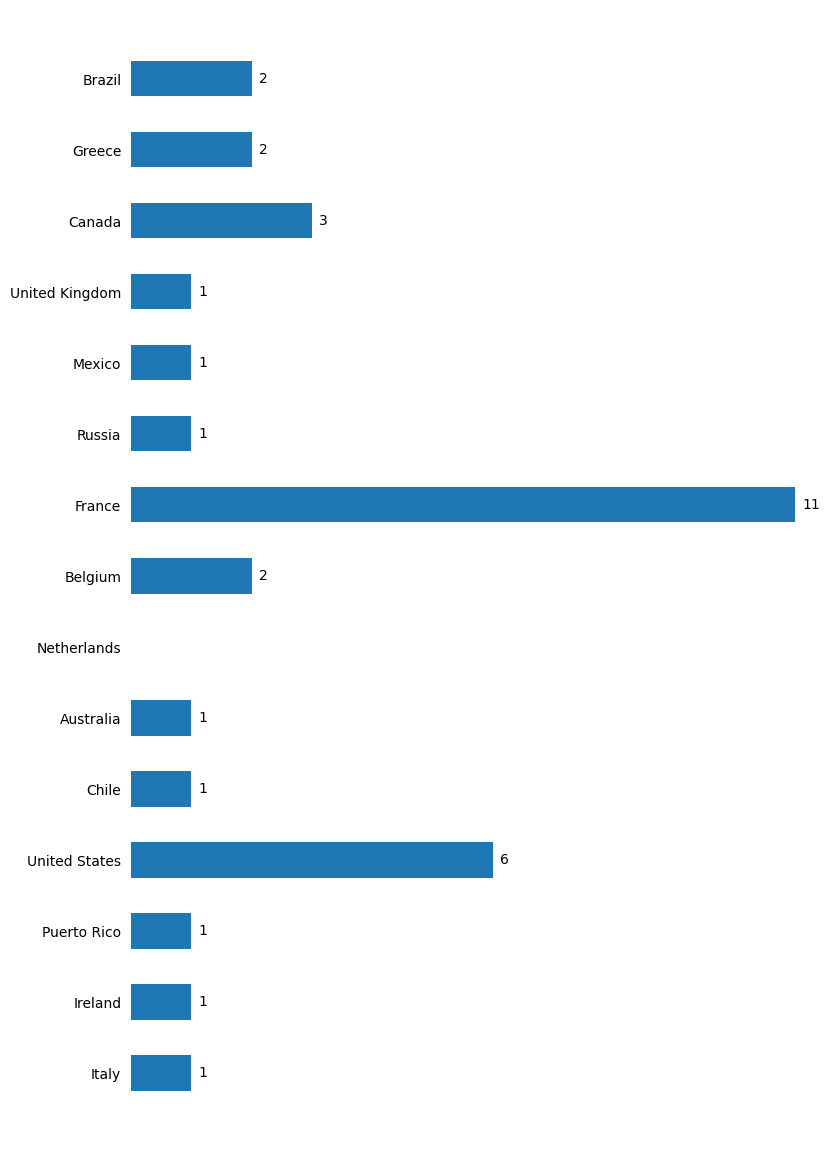

In [35]:
barplot(country_per_times_succeeded)


#### Summary
#### There were 11 successful attempts in France, so if anyone want to escape from prison, do it in France.